# PChem Exam! I decided to do 11.8, the rotational energy question.

Import the neccessary packages:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from scipy import constants

In [14]:
# the energies in this system: harmonic oscillator, with frequency and kT scaled vs each other
def energyRotDiatomic(B,J):
    # moment = constants.Planck**2/(8*constants.pi**2*(B*1.6022e-19)) # eV converted to Joules
    # print(moment)
    return (B*1.6022e-19*J*(J+1))

# the exact vibrational partition function for one mode, from McQuarrie
def qExact(B,T):
    """calculate the exact value of the partition function"""
    J = sy.symbols('j')
    return sy.N(sy.Sum((2*J+1)*sy.exp(-energyRotDiatomic(B,J)/(constants.Boltzmann * T)), (J, 0, sy.oo))) # Summation from 0 to infinity

# the analytical probability of any state v, using the known probability distribution
def exactProbResult(B,J,T):
 return sy.N((2*J+1)*sy.exp(-energyRotDiatomic(B,J)/(constants.Boltzmann * T))/qExact(B,T))

In [18]:
# print(exactProbResult_1(0.00750821,5,400))
print(qExact(0.00750821,300))

exactProbResult(0.00750821,1,300)

3.79696818565216


0.441993481391462

In [19]:
#Needed functions from Schrier text: python versions

def count(samples, entry):
  """making a python equivalent for the Mathematica "Count[]" function.
  "samples" should be your list of samples.
  "entry" should be which kind of entry you'd like to code to count for you.
  these are the same inputs that the Mathematica function would expect."""
  items, counts = np.unique(samples, axis=0, return_counts=True) # tally
  for i in range(len(items)):
    if np.array_equal(items[i],entry):
      return counts[i]

# taking one step in a Monte Carlo simulation: arguments are
# kT and frequency for this system (scaled to each other in the same energy units),
# and then a starting state of the system
# before each step, which here is "v" or the quantum number
def MCstep(B,J,kT):
    Jprime = np.maximum(J+(-1)**np.random.randint(2), 0)
    deltaE = energyRotDiatomic(B,J) - energyRotDiatomic(B,J)
    if deltaE <= 0:
      return Jprime
    else:
      randn = np.random.random()
      if randn < np.exp(-deltaE/kT):
        return Jprime
      else:
        return J

# this sets up a working Monte Carlo simulation by taking a bunch of "MCSteps"
# subject to specific arguments
# kT and the frequency are here, scaled to each other, as well as
# nEquil which is how many steps to take before recording any data and
# nDataCol, which is the total number of steps
# by default this writes the result of every 100th step (but that could be edited)
def runMC(B,T, nEquil, nDataCol):
    """
    Run a Monte Carlo simulation of the Harmonic Oscillator energy levels for some number of steps
    """
    J = 0
    JSamples = []
    for i in range(nDataCol):
        J = MCstep(B,J,T)
        # print(J)
        if i%100 == 0:
            JSamples.append(J)
    return JSamples

# this takes an outputted list of data (which is just a bunch of v's in this system)
# and calculates probability by counting some outcome
# vSamples here is the data, and vTarget here is the outcome of interest (i.e. v=0)
def MCProbResult(JSamples, JTarget):
    """
    Calculate the probability of an energy level given data from a
    Monte Carlo simulation.
    """
    return count(JSamples, JTarget)/len(JSamples)

In [24]:
B = 0.00750821
T = 300
convergenceTest = [] #dont change this; re-initializes the list of outcomes
for nDataCol in np.arange(1000,100000,2000): #dont change this; this specifies how many simulations
    convergenceTest.append(MCProbResult(runMC(B,T,100,nDataCol),0)) #put something in here to append to the list

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

ValueError: x and y must have same first dimension, but have shapes (50,) and (4,)

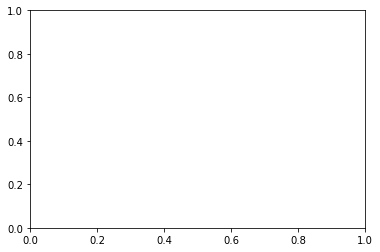

In [ ]:
plt.plot(np.arange(1000,100000,2000),convergenceTest,label='simulated')
plt.axhline(exactProbResult(B,0,T), color='r', linestyle='-',label='exact') #plot a horizontal line at the exact value
plt.xlabel("number of steps",fontsize=20)
plt.ylabel("probability of J=0",fontsize=20)
plt.legend(fontsize=20)